In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from urllib.parse import urlparse, parse_qs # parsing urls
import string
import re

import os
# print(os.listdir("C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\"))
# os.chdir("C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\")
path = os.getcwd() + '/runs'
# path = "C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\10000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_expert0"
print(path)
folder = os.path.basename(path)
print(folder)
PATH_DELIMITER = '/' # change to \\ on windows

/Users/aloha/Projects/URLNet/runs
runs


In [58]:
CHAR = 1
WORD = 2
CHAR_AND_WORD = 3
CHARWORD_AND_WORD = 4
CHARWORD_AND_WORD_AND_CHAR = 5

In [6]:
#for folder in os.listdir(path):    
#    print(folder)

In [69]:
tmp = pd.DataFrame()
df = pd.DataFrame()

for folder in os.listdir(path):
    try:
        #print(folder)
        trainsize = re.match('(^\d+)', folder).group(0)
        emb = re.match('^\d+_emb(\d)', folder).group(1)
        dlm = re.match('^\d+_emb\d_dlm(\d)', folder).group(1)
        expert = re.match('.*expert(\d)', folder).group(1)
        tmp = pd.read_csv(path + PATH_DELIMITER + folder + PATH_DELIMITER + 'train_' + trainsize + '_test_' + trainsize + '.auc', 
                         skiprows = 6, sep = '\t', header = 0, names=["decision_boundery", "TP", "FP", "TPR", "FPR"], nrows = 21)
        tmp['folder'] = folder 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = int(emb)
        tmp['delimit_mode'] = int(dlm)
        tmp['expert_mode'] = int(expert)
        df = df.append(tmp, ignore_index= True) 
        print(folder + ' ; ' + trainsize + ' ; ' + emb + ' ; '+ 'No of rows: ' + str(df.shape[0]))
    except Exception as e:
        print(e)
        #print(folder)
        pass

500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert0 ; 500000 ; 4 ; No of rows: 21
1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert1 ; 1000 ; 3 ; No of rows: 42
500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_expert0 ; 500000 ; 2 ; No of rows: 63
10000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert1 ; 10000 ; 3 ; No of rows: 84
500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_expert1 ; 500000 ; 5 ; No of rows: 105
1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert0 ; 1000 ; 2 ; No of rows: 126
500000_emb3_dlm0_32dim_minwf1_1conv3456_5ep_expert1 ; 500000 ; 3 ; No of rows: 147
10000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert0 ; 10000 ; 2 ; No of rows: 168
500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_expert1 ; 500000 ; 2 ; No of rows: 189
10000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert0 ; 10000 ; 3 ; No of rows: 210
1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert0 ; 1000 ; 3 ; No of rows: 231
500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert1 ; 500000 ; 4 ; No of rows: 252
500000_emb3_dlm0_32dim_min

In [70]:
df.head()

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
0,1.000000,2,0,0.000063,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
1,0.999955,1584,0,0.050036,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
2,0.999920,3167,0,0.100041,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
3,0.999838,4750,0,0.150046,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
4,0.999635,6333,0,0.200051,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0


In [5]:
# df.to_csv('D:\\georg\\python_projects\\deeplearning\\URLNet\\auc_all.csv')

In [72]:
# df[(df.train_size == '10000') & (df.embed_mode == '5')]
df_small = df[(df.train_size == 1000)]
df_med = df[(df.train_size == 10000)]
df_large = df[(df.train_size == 50000)]
df_full = df[(df.train_size == 500000)]

In [116]:
def plotauc(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    df_ = df

    fig, ax = plt.subplots(1,1, figsize = (10,10))
    df_.groupby("folder").plot(x = 'FPR', y = 'TPR', ax = ax)
    plt.title('AUC')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xscale('log')
    ax.set_ylim([0,1])
    ax.grid(which='major', linestyle='-', linewidth='0.1', color='grey')

    lgd = plt.legend([v[0] for v in df_.groupby('folder')['folder']], loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

    #art = []
    #art.append(lgd)
    plt.show()
    return plt
    


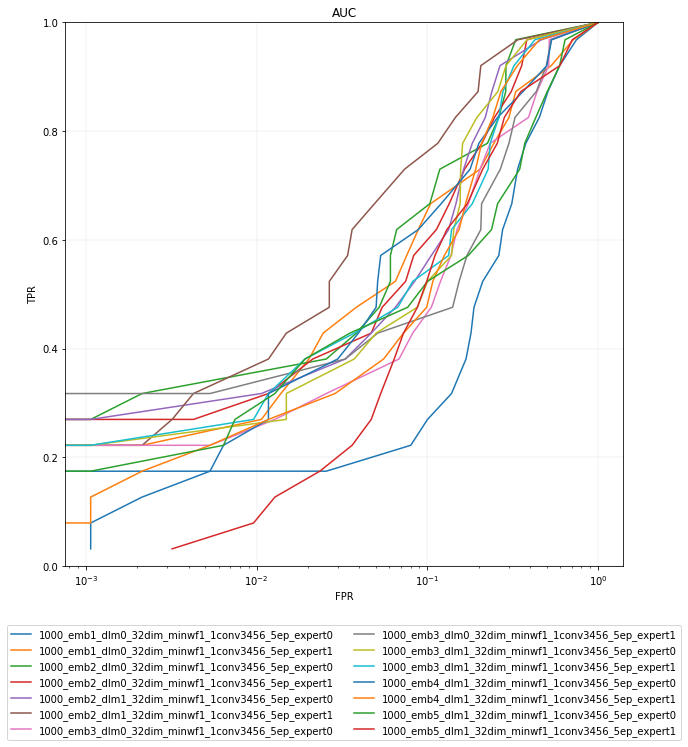

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [117]:
plotauc(df_small)

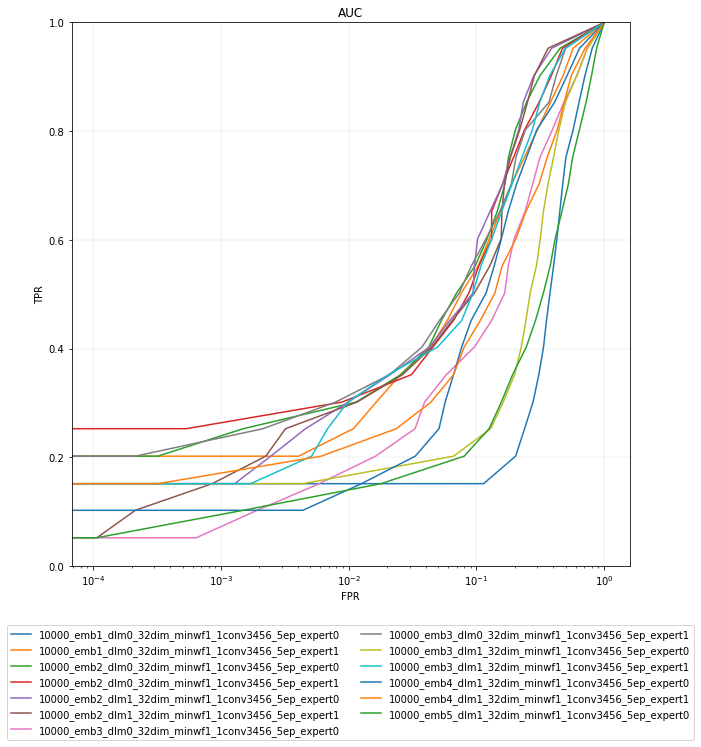

In [108]:
plotauc(df_med)

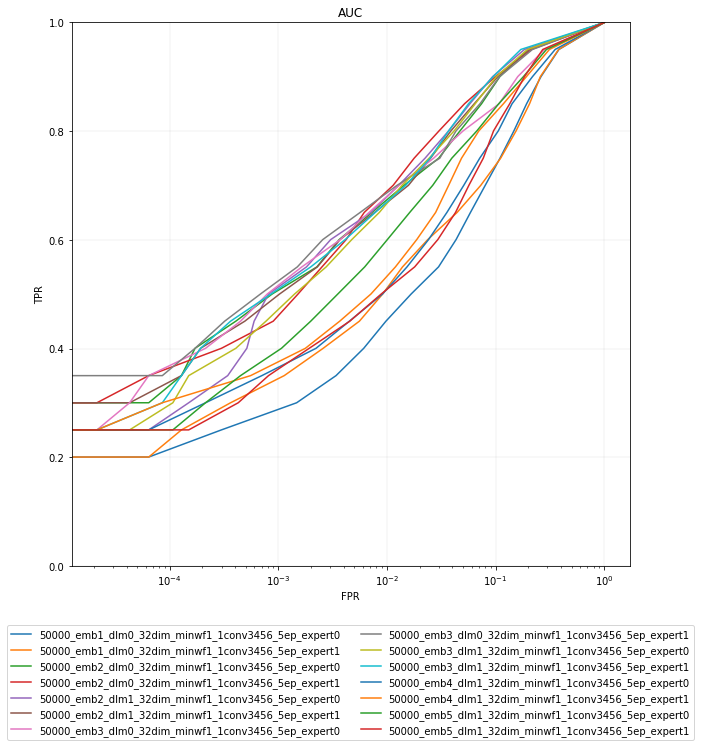

In [63]:
plotauc(df_large)

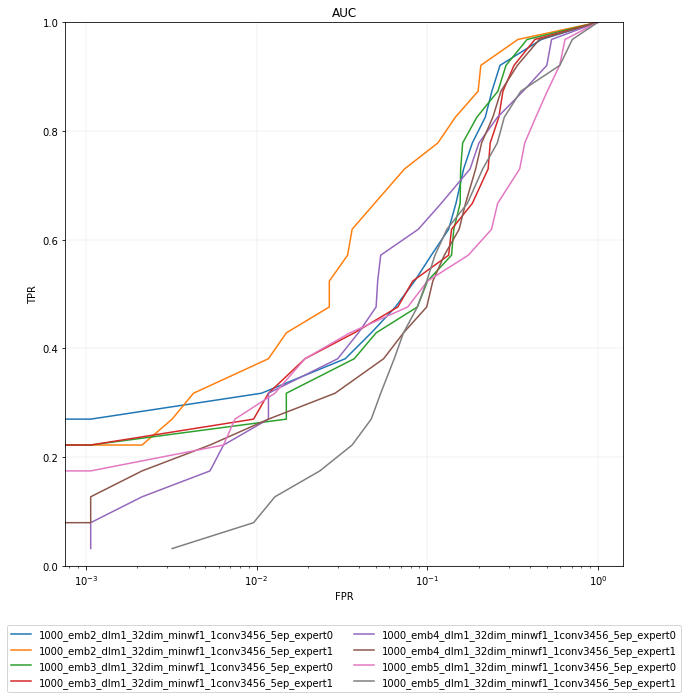

In [76]:
# compare only delimit mode=1, small dataset
dfp = df_small[ (df_small.delimit_mode == 1) ] #& ((df.embed_mode == '3' ) | (df.embed_mode == '5'))]
plotauc(dfp)

In [65]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
115,0.110747,33,79,0.523810,0.084312,1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,2,1,0
308,0.106240,46,69,0.730159,0.073639,1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,2,1,1
219,0.056981,30,82,0.476190,0.087513,1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,3,1,0
31,0.071699,33,77,0.523810,0.082177,1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,3,1,1
600,0.128801,39,83,0.619048,0.088581,1000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,4,1,0
870,0.131224,30,93,0.476190,0.099253,1000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,4,1,1
744,0.122173,30,72,0.476190,0.076841,1000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,5,1,0
472,0.093082,33,93,0.523810,0.099253,1000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,5,1,1


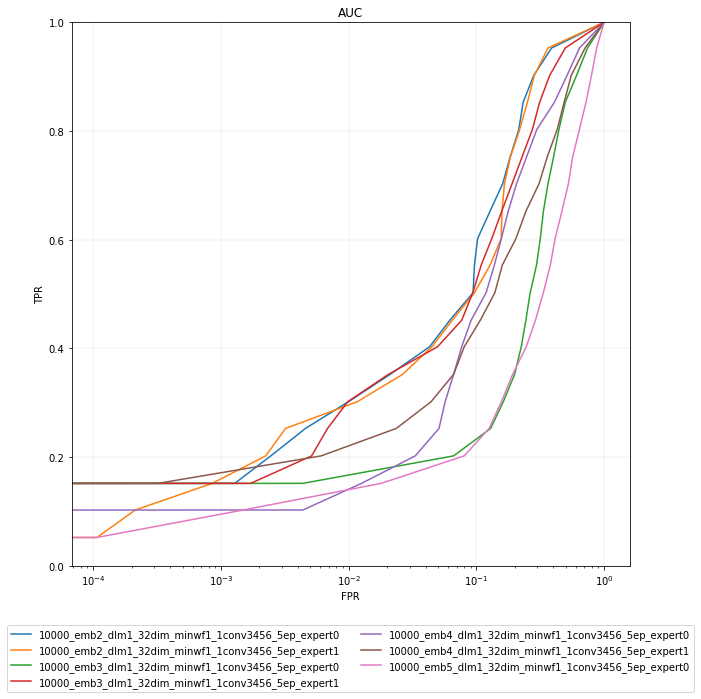

In [77]:
# compare only delimit mode=1, med dataset
dfp = df_med[ (df_med.delimit_mode == 1) ] #& ((df.embed_mode == '3' ) | (df.embed_mode == '5'))]
plotauc(dfp)

In [29]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
115,0.110747,33,79,0.523810,0.084312,1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,2,1,0
308,0.106240,46,69,0.730159,0.073639,1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,2,1,1
219,0.056981,30,82,0.476190,0.087513,1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,3,1,0
31,0.071699,33,77,0.523810,0.082177,1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,3,1,1
600,0.128801,39,83,0.619048,0.088581,1000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,4,1,0
870,0.131224,30,93,0.476190,0.099253,1000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,4,1,1
744,0.122173,30,72,0.476190,0.076841,1000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_expert0,1000,5,1,0
472,0.093082,33,93,0.523810,0.099253,1000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,5,1,1


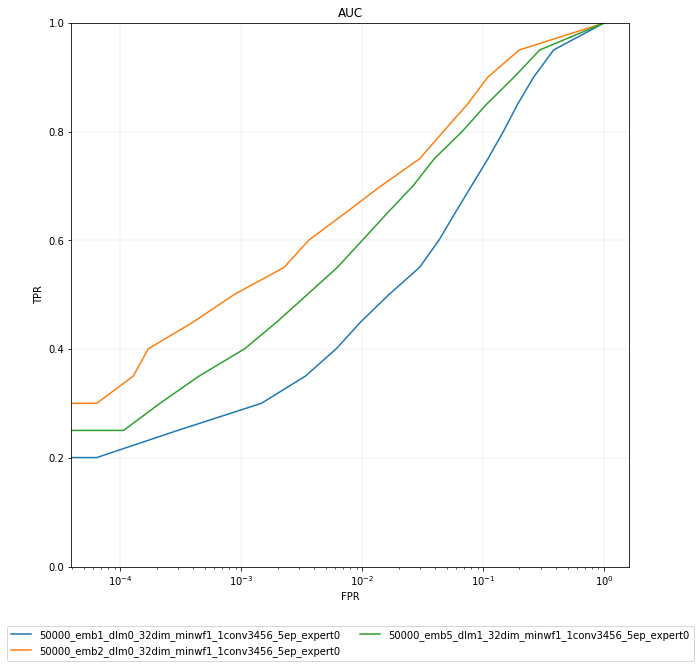

In [98]:
# compare only delimit mode=1, large dataset
emb_filter = ((df_large.embed_mode == CHAR) | ((df_large.embed_mode == WORD) & (df_large.delimit_mode == 0)) | (df_large.embed_mode == CHARWORD_AND_WORD_AND_CHAR))

dfp = df_large[emb_filter]
dfp = dfp[ (dfp.expert_mode == 0)]
plotauc(dfp)

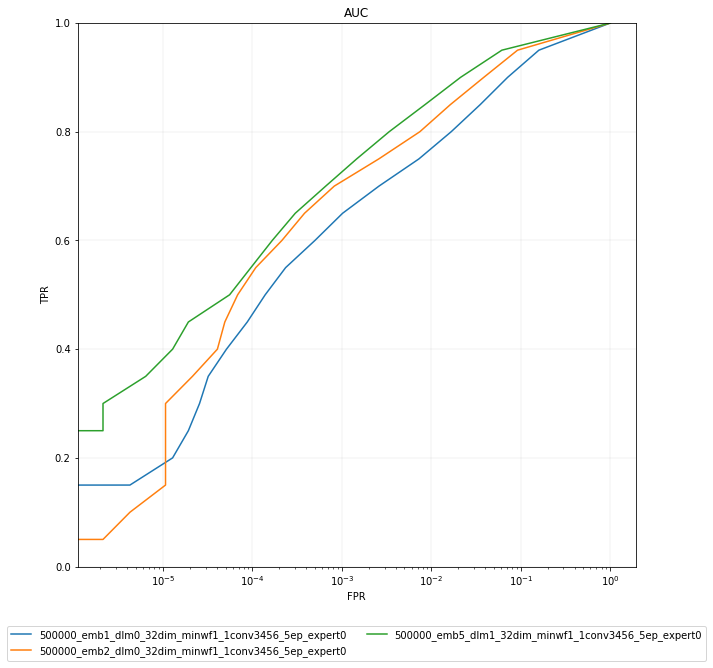

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [118]:
# compare only delimit mode=1, large dataset
emb_filter = ((df_full.embed_mode == CHAR) | ((df_full.embed_mode == WORD) & (df_full.delimit_mode == 0)) | (df_full.embed_mode == CHARWORD_AND_WORD_AND_CHAR))

dfp = df_full[emb_filter]
dfp = dfp[ (dfp.expert_mode == 0)]
plotauc(dfp)

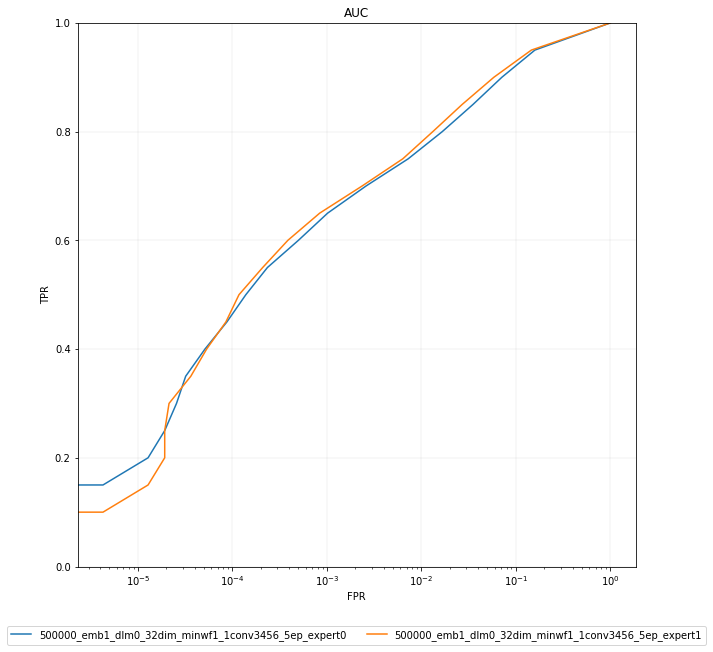

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [120]:
# compare only char mode, full dataset
dfp = df_full[(df_full.embed_mode == CHAR)]
plotauc(dfp)

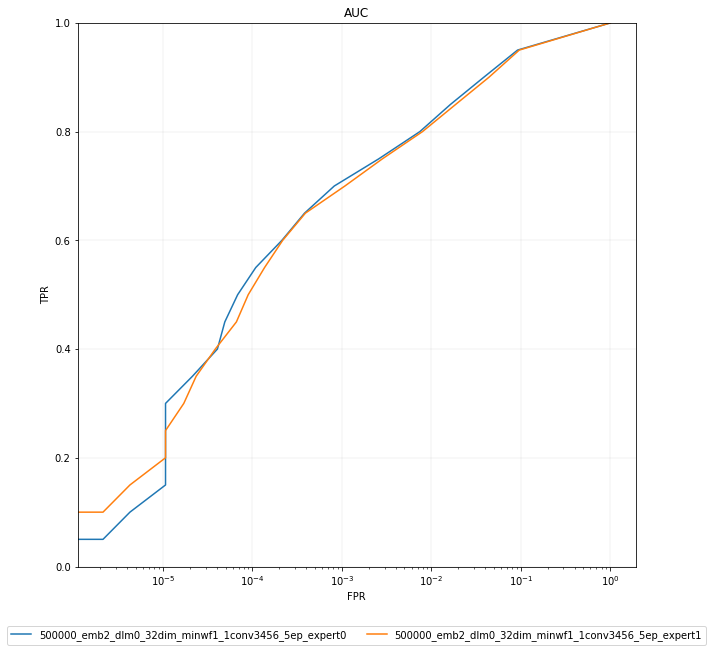

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [122]:
# compare only word mode, full dataset
dfp = df_full[(df_full.embed_mode == WORD) & (df_full.delimit_mode == 0)]
plotauc(dfp)

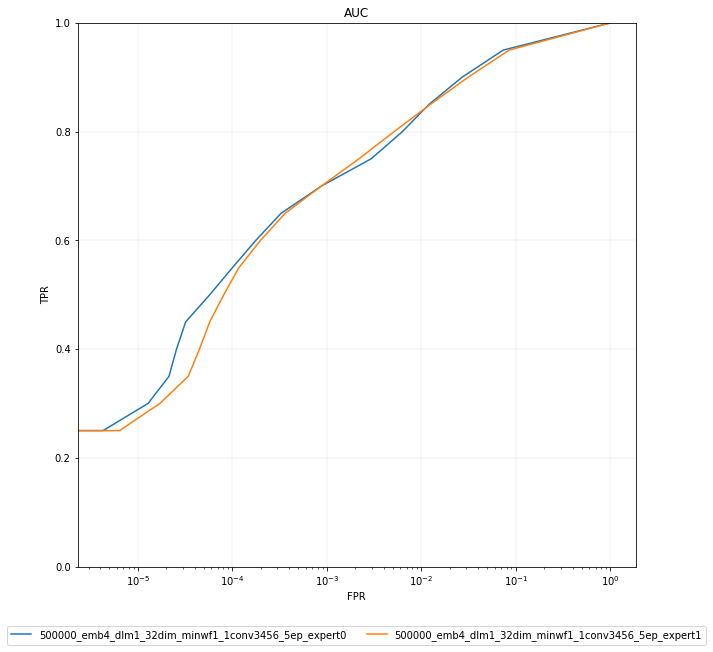

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [125]:
# compare only full mode, full dataset
dfp = df_full[(df_full.embed_mode == CHARWORD_AND_WORD)]
plotauc(dfp)

In [97]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
497,0.089289,2217,3760,0.700474,0.080282,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
920,0.071545,2692,3478,0.850553,0.074261,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
354,0.036643,2850,4400,0.900474,0.093947,50000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,2,1,0
1108,0.065620,2534,3150,0.800632,0.067257,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0


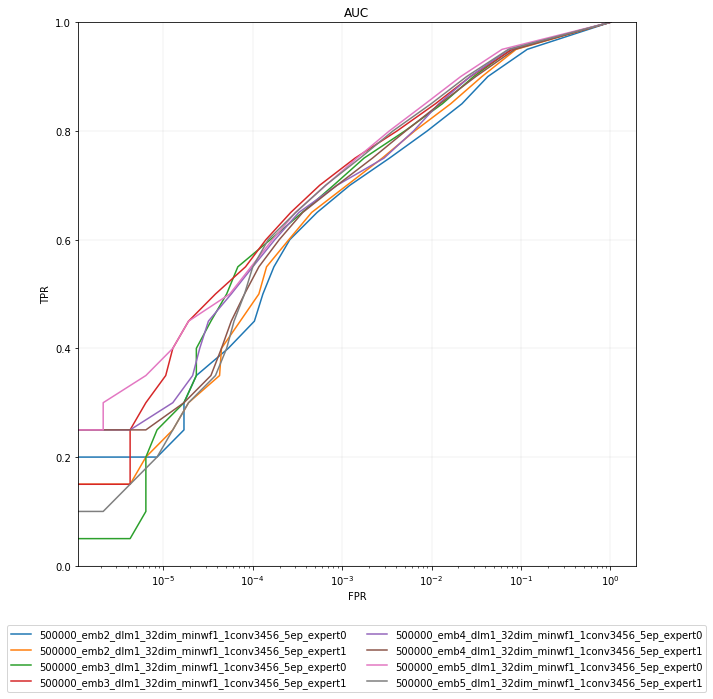

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
0,1.000000,2,0,0.000063,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
1,0.999955,1584,0,0.050036,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
2,0.999920,3167,0,0.100041,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
3,0.999838,4750,0,0.150046,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
4,0.999635,6333,0,0.200051,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0


In [79]:
# compare only delimit mode=1, full dataset
dfp = df_full[ (df_full.delimit_mode == 1) ] #& ((df.embed_mode == '3' ) | (df.embed_mode == '5'))]
plotauc(dfp)
dfp.head()

In [33]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
522,0.059290,28493,19952,0.900054,0.042601,500000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,2,1,0
712,0.036377,30076,41240,0.950058,0.088055,500000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,2,1,1
838,0.037835,30076,36381,0.950058,0.077680,500000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,3,1,0
628,0.022942,30076,37371,0.950058,0.079794,500000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,3,1,1
19,0.024923,30076,34494,0.950058,0.073651,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
250,0.043673,30076,39833,0.950058,0.085051,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,1
334,0.030952,30076,28749,0.950058,0.061384,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
103,0.024214,30076,33837,0.950058,0.072248,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1


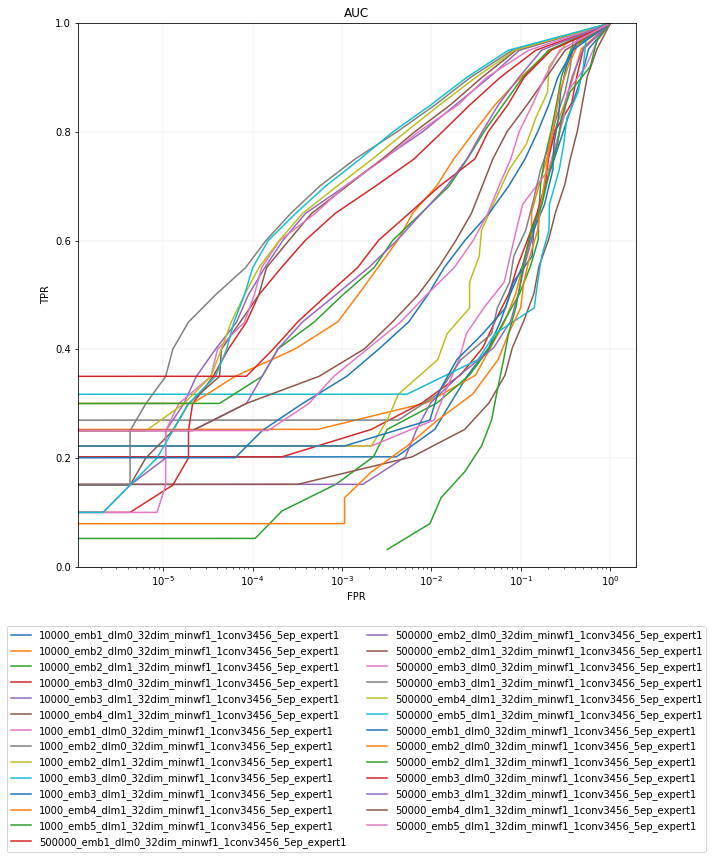

In [80]:
# compare only delimit mode=1, full dataset
dfp = df[ (df.expert_mode == 1) ] #& ((df.embed_mode == '3' ) | (df.embed_mode == '5'))]
plotauc(dfp)

In [35]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
1081,0.081643,318,714,0.502370,0.076225,10000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,10000,1,0,1
850,0.149343,318,818,0.502370,0.087328,10000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,10000,2,0,1
283,0.208205,318,904,0.502370,0.096509,10000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_exp...,10000,2,1,1
536,0.080265,350,857,0.552923,0.091491,10000_emb3_dlm0_32dim_minwf1_1conv3456_5ep_exp...,10000,3,0,1
73,0.046381,318,878,0.502370,0.093733,10000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_exp...,10000,3,1,1
890,0.112625,255,751,0.402844,0.080175,10000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_exp...,10000,4,1,1
1125,0.056104,39,83,0.619048,0.088581,1000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_expert1,1000,1,0,1
809,0.066698,36,78,0.571429,0.083244,1000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_expert1,1000,2,0,1
308,0.106240,46,69,0.730159,0.073639,1000_emb2_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,2,1,1
554,0.054806,27,48,0.428571,0.051227,1000_emb3_dlm0_32dim_minwf1_1conv3456_5ep_expert1,1000,3,0,1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [ ]:
# path = "C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\1000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_expert0"
# print(path)
# folder = os.path.basename(path)
# print(folder)
# trainsize = re.match('(^\d+)', folder).group(0)
# print(trainsize)
# print(path + '\\' + 'train_' + trainsize + '_test_' + trainsize + '.auc')

In [ ]:
# df = pd.read_csv(path + '\\' + 'train_' + trainsize + '_test_' + trainsize + '.auc',
#                 skiprows = 6, sep = '\t', header = 0, names=["decision_boundery", "TP", "FP", "TPR", "FPR"], nrows = 21)
# df['folder'] = folder
# df = df.append(df1, ignore_index = True)
# df.shape[0]